In [1]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import statistics as stat
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

col = ['q1s1','q1s2','q1s3', 'q1s4','q1s5', 'q1s6', 'q1s7', 'q1s8', 'q1s9', 'q1s10', 'q2c1', 'q2c2', 'q2c3', 'q2c4','q2c5', 'q2c6', 'q2c7', 'q2c8','q2c9', 'q2c10', 'q3', 'q4', 'q5s1', 'q5s2', 'q5s3', 'q5s4', 'q5s5','q5s6', 'q5s7', 'q5s8', 'q5s9', 'q5s10', 'q5s11', 'q5s12', 'q5s13','q5s14', 'q5s15','q6']

survey2 = pd.read_csv("/Users/yuuki/survey2Rawdata.csv")

In [2]:
# k-means

# お試し
survey2_clustering = survey2[col]

sc = StandardScaler()
survey2_clustering_sc = sc.fit_transform(survey2_clustering)

kmeans = KMeans(n_clusters=4, random_state=0)

clusters = kmeans.fit(survey2_clustering_sc)

survey2_clustering["cluster"] = clusters.labels_

print(survey2_clustering["cluster"].unique())

survey2_clustering.head()

[0 2 1 3]


/Users/yuuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,q1s1,q1s2,q1s3,q1s4,q1s5,q1s6,q1s7,q1s8,q1s9,q1s10,...,q5s8,q5s9,q5s10,q5s11,q5s12,q5s13,q5s14,q5s15,q6,cluster
0,2,3,3,3,3,3,3,3,3,3,...,2,4,2,2,2,3,3,2,3,0
1,2,3,2,3,2,3,3,3,3,3,...,1,4,1,3,2,3,3,1,1,2
2,1,3,3,3,3,3,3,3,3,3,...,1,1,1,2,1,1,1,3,2,2
3,1,3,3,3,3,3,3,3,3,3,...,2,3,3,3,3,3,3,2,2,0
4,1,1,2,3,3,3,3,3,3,3,...,3,2,2,3,2,2,2,3,4,2


In [3]:
survey2_clustering.groupby("cluster").mean()

,q1s1,q1s2,q1s3,q1s4,q1s5,q1s6,q1s7,q1s8,q1s9,q1s10,...,q5s7,q5s8,q5s9,q5s10,q5s11,q5s12,q5s13,q5s14,q5s15,q6
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.818182,2.768595,2.842975,2.851240,2.859504,2.900826,2.768595,2.859504,2.925620,2.933884,...,2.917355,2.966942,3.247934,2.520661,3.181818,2.619835,2.909091,2.975207,2.719008,3.016529
1,2.166667,3.000000,2.944444,2.944444,3.000000,3.000000,2.722222,2.888889,3.000000,3.000000,...,4.388889,4.111111,4.611111,3.722222,4.555556,4.333333,4.555556,4.277778,3.888889,3.888889
2,1.340206,2.371134,2.556701,2.525773,2.597938,2.896907,2.659794,2.608247,2.927835,2.845361,...,1.876289,1.969072,2.402062,1.804124,2.587629,1.876289,1.938144,2.000000,1.670103,2.360825
3,1.272727,1.454545,1.575758,1.787879,1.666667,1.969697,1.666667,1.727273,2.090909,2.272727,...,1.848485,1.757576,1.909091,1.636364,2.333333,1.909091,2.060606,1.939394,1.757576,2.424242


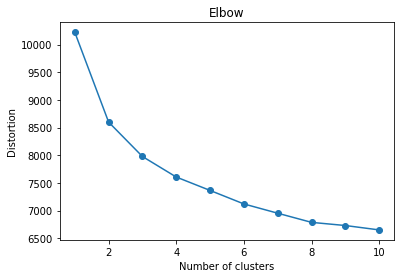

In [4]:
# エルボー法でベストなクラスター数を計算
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                random_state=0)
    km.fit(survey2_clustering_sc)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Elbow")
plt.show()

In [96]:
for i in range(1, 10):
   if((distortions[i-1] - distortions[i]) < 100):
       best_clusters = i
       break
print("ベストクラスタ数 ", best_clusters)

ベストクラスタ数  8


In [6]:
# クラスター数を8にしてクラスタリング
survey2_clustering = survey2[col]

sc = StandardScaler()
survey2_clustering_sc = sc.fit_transform(survey2_clustering)

kmeans = KMeans(n_clusters=8, random_state=0)

clusters = kmeans.fit(survey2_clustering_sc)

survey2_clustering["cluster"] = clusters.labels_

print(survey2_clustering["cluster"].unique())

survey2_clustering.head()

[3 2 5 0 4 1 6 7]


/Users/yuuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,q1s1,q1s2,q1s3,q1s4,q1s5,q1s6,q1s7,q1s8,q1s9,q1s10,...,q5s8,q5s9,q5s10,q5s11,q5s12,q5s13,q5s14,q5s15,q6,cluster
0,2,3,3,3,3,3,3,3,3,3,...,2,4,2,2,2,3,3,2,3,3
1,2,3,2,3,2,3,3,3,3,3,...,1,4,1,3,2,3,3,1,1,2
2,1,3,3,3,3,3,3,3,3,3,...,1,1,1,2,1,1,1,3,2,5
3,1,3,3,3,3,3,3,3,3,3,...,2,3,3,3,3,3,3,2,2,3
4,1,1,2,3,3,3,3,3,3,3,...,3,2,2,3,2,2,2,3,4,2


In [7]:
survey2_clustering.groupby("cluster").mean()

,q1s1,q1s2,q1s3,q1s4,q1s5,q1s6,q1s7,q1s8,q1s9,q1s10,...,q5s7,q5s8,q5s9,q5s10,q5s11,q5s12,q5s13,q5s14,q5s15,q6
cluster,,,,,,,,,,,,,,,,,,,,,
0,2.187500,3.000000,2.937500,2.937500,3.000000,3.000000,2.687500,2.875000,3.000000,3.000000,...,4.500000,4.125000,4.625000,3.875000,4.625000,4.375000,4.625000,4.375000,3.875000,3.937500
1,1.538462,1.846154,1.923077,2.000000,1.961538,2.230769,2.000000,2.346154,2.346154,2.423077,...,2.884615,2.615385,2.884615,2.384615,2.961538,2.423077,2.884615,2.807692,2.423077,2.846154
2,1.500000,2.564516,2.661290,2.725806,2.806452,2.903226,2.822581,2.758065,2.919355,2.870968,...,2.112903,2.080645,2.564516,1.903226,2.725806,1.951613,1.983871,2.193548,1.838710,2.258065
3,1.903226,2.881720,2.946237,2.956989,2.967742,2.989247,2.838710,2.870968,2.989247,2.989247,...,2.924731,3.053763,3.290323,2.473118,3.236559,2.677419,2.935484,2.989247,2.806452,3.182796
4,1.194444,1.944444,2.305556,2.000000,2.083333,2.722222,2.500000,2.194444,2.833333,2.777778,...,1.388889,1.472222,2.166667,1.583333,2.500000,1.666667,1.722222,1.638889,1.277778,2.555556
5,1.200000,2.600000,2.600000,2.850000,2.800000,3.000000,2.450000,2.900000,3.000000,3.000000,...,2.450000,2.600000,2.550000,2.400000,2.800000,2.300000,2.750000,2.550000,2.250000,2.350000
6,1.375000,1.625000,1.875000,2.375000,2.125000,2.375000,1.750000,2.000000,2.500000,2.625000,...,1.750000,2.250000,2.250000,1.375000,2.000000,2.250000,2.000000,2.000000,2.000000,2.000000
7,1.000000,1.125000,1.375000,1.375000,1.250000,1.250000,1.250000,1.250000,1.375000,1.500000,...,1.500000,1.500000,1.375000,1.625000,1.500000,1.625000,1.500000,1.500000,1.500000,2.000000


q6の結果について、非常に魅力に感じるが1のままなので、平均点が低いほど魅力に感じている人が多いということ。
したがって、クラスター7、8が1番自分たちのサービスを魅力的に感じている。逆に、1番魅力的に感じていないのはクラスター0

In [8]:
mean_cluster = survey2_clustering.groupby("cluster").mean()

In [9]:
mean_cluster[[ 'q2c1', 'q2c2', 'q2c3', 'q2c4','q2c5', 'q2c6', 'q2c7', 'q2c8','q2c9', 'q2c10']]

,q2c1,q2c2,q2c3,q2c4,q2c5,q2c6,q2c7,q2c8,q2c9,q2c10
cluster,,,,,,,,,,
0,0.000000,0.187500,0.062500,0.250000,0.000000,0.250000,0.250000,0.000000,0.187500,0.125000
1,0.038462,0.115385,0.423077,0.346154,0.000000,0.192308,0.500000,0.076923,0.192308,0.076923
2,0.000000,0.419355,0.241935,0.193548,0.000000,0.370968,0.387097,0.064516,0.209677,0.000000
3,0.032258,0.376344,0.161290,0.139785,0.021505,0.258065,0.301075,0.021505,0.053763,0.064516
4,0.138889,0.666667,0.444444,0.500000,0.000000,0.555556,0.611111,0.166667,0.055556,0.055556
5,0.950000,0.550000,0.150000,0.200000,0.000000,0.150000,0.000000,0.050000,0.000000,0.050000
6,0.250000,0.625000,0.625000,0.750000,1.000000,0.625000,0.375000,0.125000,0.250000,0.000000
7,0.500000,0.750000,0.625000,0.500000,0.375000,0.375000,0.500000,0.500000,0.625000,0.000000


In [10]:
print(type(mean_cluster))

<class 'pandas.core.frame.DataFrame'>


In [11]:
mean_cluster.loc[[0,6,7],[ 'q2c1', 'q2c2', 'q2c3', 'q2c4','q2c5', 'q2c6', 'q2c7', 'q2c8','q2c9', 'q2c10']]

,q2c1,q2c2,q2c3,q2c4,q2c5,q2c6,q2c7,q2c8,q2c9,q2c10
cluster,,,,,,,,,,
0,0.00,0.1875,0.0625,0.25,0.000,0.250,0.250,0.000,0.1875,0.125
6,0.25,0.6250,0.6250,0.75,1.000,0.625,0.375,0.125,0.2500,0.000
7,0.50,0.7500,0.6250,0.50,0.375,0.375,0.500,0.500,0.6250,0.000


In [12]:
survey2_clustering.groupby("cluster").count()

,q1s1,q1s2,q1s3,q1s4,q1s5,q1s6,q1s7,q1s8,q1s9,q1s10,...,q5s7,q5s8,q5s9,q5s10,q5s11,q5s12,q5s13,q5s14,q5s15,q6
cluster,,,,,,,,,,,,,,,,,,,,,
0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
1,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
2,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
3,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
4,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
5,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
6,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
7,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


検定をしていないので、断言はできないが、「旅行先で使いたいから」、「外国人と交流したいから」あたりが、サービスの評価に影響してるかもしれない。

検定をしようと思う。まずは、q6の回答について、各クラスターごとの平均点の差があるかを検定する。

正規性の検定

In [13]:
cluster0_q6 = survey2_clustering[survey2_clustering["cluster"]==0]["q6"]

In [14]:
len(cluster0_q6)

16

(array([1., 0., 0., 5., 0., 0., 4., 0., 0., 6.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <a list of 10 Patch objects>)

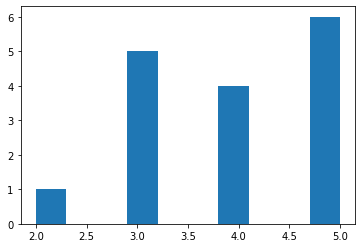

In [15]:
plt.hist(cluster0_q6)

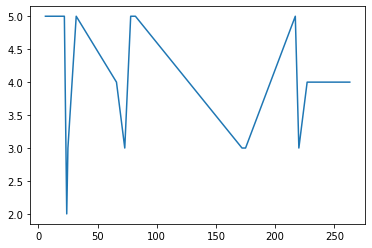

In [16]:
plt.plot(cluster0_q6)

プロットしてみたが、正規性があるのかよくわからん

シャピロウィルク検定というものをやってみる

In [25]:
#stats.shapiro(cluster0_q6)

2番目の出力値がp値である。0.05以下のため棄却。よって、正規分布と判断できない。同様に他のクラスターについても行う。

In [26]:
cluster1_q6 = survey2_clustering[survey2_clustering["cluster"]==1]["q6"]
#stats.shapiro(cluster1_q6)

In [27]:
cluster2_q6 = survey2_clustering[survey2_clustering["cluster"]==2]["q6"]
#stats.shapiro(cluster2_q6)

In [28]:
cluster3_q6 = survey2_clustering[survey2_clustering["cluster"]==3]["q6"]
#

In [29]:
cluster4_q6 = survey2_clustering[survey2_clustering["cluster"]==4]["q6"]
#

In [30]:
cluster5_q6 = survey2_clustering[survey2_clustering["cluster"]==5]["q6"]
#

In [31]:
cluster6_q6 = survey2_clustering[survey2_clustering["cluster"]==6]["q6"]#stats.shapiro(cluster6_q6)

In [32]:
cluster7_q6 = survey2_clustering[survey2_clustering["cluster"]==7]["q6"]
#_q6)

正規性の検定をしたところ、全てのクラスターは正規分布に従っているとは言えない。

従って、クラスカル・ウォリスの検定を行う。

In [33]:
print(cluster0_q6)

6      5
22     5
24     2
25     3
32     5
66     4
73     3
78     5
82     5
172    3
175    3
217    5
220    3
227    4
231    4
263    4
Name: q6, dtype: int64


In [34]:
cnt = [0,0,0,0,0]
for i in cluster0_q6:
    tmp = i
    tmp -= 1
    cnt[tmp] += 1
print(cnt)

[0, 1, 5, 4, 6]


In [35]:
score = np.array([5,4,3,2,1])
cnt = np.array(cnt)
res = sum(score*cnt)
res /= sum(cnt)
print(res)

2.0625


In [36]:
q6_mean = []
q6_mean.append(res)

In [37]:
cnt = [0,0,0,0,0]
for i in cluster1_q6:
    tmp = i
    tmp -= 1
    cnt[tmp] += 1
print(cnt)
cnt = np.array(cnt)
res = sum(score*cnt)
res /= sum(cnt)
print(res)

[2, 8, 11, 2, 3]
3.1538461538461537


In [38]:
q6_mean.append(res)

In [39]:
cnt = [0,0,0,0,0]
for i in cluster2_q6:
    tmp = i
    tmp -= 1
    cnt[tmp] += 1
print(cnt)
cnt = np.array(cnt)
res = sum(score*cnt)
res /= sum(cnt)
print(res)

[12, 29, 15, 5, 1]
3.7419354838709675


In [40]:
q6_mean.append(res)

In [41]:
cnt = [0,0,0,0,0]
for i in cluster3_q6:
    tmp = i
    tmp -= 1
    cnt[tmp] += 1
print(cnt)
cnt = np.array(cnt)
res = sum(score*cnt)
res /= sum(cnt)
print(res)

[2, 22, 40, 15, 14]
2.817204301075269


In [42]:
q6_mean.append(res)

In [43]:
cnt = [0,0,0,0,0]
for i in cluster4_q6:
    tmp = i
    tmp -= 1
    cnt[tmp] += 1
print(cnt)
cnt = np.array(cnt)
res = sum(score*cnt)
res /= sum(cnt)
print(res)

[7, 12, 10, 4, 3]
3.4444444444444446


In [44]:
q6_mean.append(res)

In [45]:
cnt = [0,0,0,0,0]
for i in cluster5_q6:
    tmp = i
    tmp -= 1
    cnt[tmp] += 1
print(cnt)
cnt = np.array(cnt)
res = sum(score*cnt)
res /= sum(cnt)
print(res)

[3, 10, 5, 1, 1]
3.65


In [46]:
q6_mean.append(res)

In [47]:
cnt = [0,0,0,0,0]
for i in cluster6_q6:
    tmp = i
    tmp -= 1
    cnt[tmp] += 1
print(cnt)
cnt = np.array(cnt)
res = sum(score*cnt)
res /= sum(cnt)
print(res)

[3, 2, 3, 0, 0]
4.0


In [48]:
q6_mean.append(res)

In [49]:
cnt = [0,0,0,0,0]
for i in cluster7_q6:
    tmp = i
    tmp -= 1
    cnt[tmp] += 1
print(cnt)
cnt = np.array(cnt)
res = sum(score*cnt)
res /= sum(cnt)
print(res)

[4, 2, 1, 0, 1]
4.0


In [50]:
q6_mean.append(res)

In [51]:
q6_mean

[2.0625,
 3.1538461538461537,
 3.7419354838709675,
 2.817204301075269,
 3.4444444444444446,
 3.65,
 4.0,
 4.0]

上にあるのが、点数を補正後の平均値。こう見ても、明らかにクラスター0とクラスター６、7には違いがあるように見える。

違いがあるかどうかを示すための検定の方法が...

クラスタリングした結果はどこまで使って良いの？
例えば、この結果をもとに、こういう人たちが自分たちのサービスを推しているとか言って良いの？
ググったら、クラスタリングは分析者がデータ自体を理解するためにやるものと言っていた。どーゆーこと？

In [52]:
cluster0 = survey2_clustering[survey2_clustering["cluster"]==0]

In [53]:
cluster6 = survey2_clustering[survey2_clustering["cluster"]==6]
cluster7 = survey2_clustering[survey2_clustering["cluster"]==7]

In [54]:
for i in range(8):
    print("cluster" + str(i) + ": " + str(q6_mean[i]) + "\n")

cluster0: 2.0625

cluster1: 3.1538461538461537

cluster2: 3.7419354838709675

cluster3: 2.817204301075269

cluster4: 3.4444444444444446

cluster5: 3.65

cluster6: 4.0

cluster7: 4.0



In [55]:
mean_cluster.loc[[0,6,7],[ "q3", "q4"]]

,q3,q4
cluster,,
0,4.0625,6.6875
6,3.2500,3.1250
7,2.2500,2.6250


In [56]:
mean_cluster.loc[[0,6,7],[ 'q5s1', 'q5s2', 'q5s3', 'q5s4', 'q5s5','q5s6', 'q5s7', 'q5s8', 'q5s9', 'q5s10', 'q5s11', 'q5s12', 'q5s13','q5s14', 'q5s15']]

,q5s1,q5s2,q5s3,q5s4,q5s5,q5s6,q5s7,q5s8,q5s9,q5s10,q5s11,q5s12,q5s13,q5s14,q5s15
cluster,,,,,,,,,,,,,,,
0,3.125,3.375,3.5625,2.9375,4.4375,3.9375,4.50,4.125,4.625,3.875,4.625,4.375,4.625,4.375,3.875
6,2.000,3.000,2.0000,2.7500,2.2500,1.8750,1.75,2.250,2.250,1.375,2.000,2.250,2.000,2.000,2.000
7,1.500,1.750,1.2500,1.6250,1.3750,1.5000,1.50,1.500,1.375,1.625,1.500,1.625,1.500,1.500,1.500


In [57]:
cnt = [[0,0,0,0,0] for _ in range(15)]
q5_cols = [ 'q5s1', 'q5s2', 'q5s3', 'q5s4', 'q5s5','q5s6', 'q5s7', 'q5s8', 'q5s9', 'q5s10', 'q5s11', 'q5s12', 'q5s13','q5s14', 'q5s15']

cluster0 = cluster0.reset_index(drop = True)
cluster6 = cluster6.reset_index(drop = True)
cluster7 = cluster7.reset_index(drop = True)

In [58]:
for i in range(len(q5_cols)):
    for j in range(len(cluster0)):
        tmp = cluster0[q5_cols[i]][j]
        tmp -= 1
        cnt[i][tmp] += 1
print(cnt)

[[3, 4, 1, 4, 4], [3, 2, 1, 6, 4], [2, 2, 2, 5, 5], [4, 3, 2, 4, 3], [0, 0, 1, 7, 8], [1, 0, 4, 5, 6], [0, 0, 0, 8, 8], [1, 0, 1, 8, 6], [0, 0, 0, 6, 10], [0, 2, 4, 4, 6], [0, 0, 1, 4, 11], [0, 1, 0, 7, 8], [0, 0, 0, 6, 10], [0, 0, 1, 8, 7], [0, 2, 3, 6, 5]]


In [59]:
res0 = []
for i in range(15):
    tmp = cnt[i]
    tmp = np.array(tmp)
    ans = sum(tmp*score)
    ans /= 16
    res0.append(ans)
print("cluster0: ", res0)

cluster0:  [2.875, 2.625, 2.4375, 3.0625, 1.5625, 2.0625, 1.5, 1.875, 1.375, 2.125, 1.375, 1.625, 1.375, 1.625, 2.125]


In [60]:
cnt = [[0,0,0,0,0] for _ in range(15)]
for i in range(len(q5_cols)):
    for j in range(len(cluster6)):
        tmp = cluster6[q5_cols[i]][j]
        tmp -= 1
        cnt[i][tmp] += 1
print(cnt)

[[2, 4, 2, 0, 0], [0, 2, 5, 0, 1], [2, 5, 0, 1, 0], [1, 2, 4, 0, 1], [2, 3, 2, 1, 0], [3, 3, 2, 0, 0], [3, 4, 1, 0, 0], [2, 3, 2, 1, 0], [1, 4, 3, 0, 0], [5, 3, 0, 0, 0], [3, 3, 1, 1, 0], [1, 5, 1, 1, 0], [2, 5, 0, 1, 0], [3, 3, 1, 1, 0], [3, 3, 1, 1, 0]]


In [61]:
res6 = []
for i in range(15):
    tmp = cnt[i]
    tmp = np.array(tmp)
    ans = sum(tmp*score)
    ans /= 8
    res6.append(ans)
print("cluster6: ", res6)

cluster6:  [4.0, 3.0, 4.0, 3.25, 3.75, 4.125, 4.25, 3.75, 3.75, 4.625, 4.0, 3.75, 4.0, 4.0, 4.0]


In [62]:
cnt = [[0,0,0,0,0] for _ in range(15)]
for i in range(len(q5_cols)):
    for j in range(len(cluster7)):
        tmp = cluster7[q5_cols[i]][j]
        tmp -= 1
        cnt[i][tmp] += 1
print(cnt)

[[5, 2, 1, 0, 0], [5, 1, 1, 1, 0], [6, 2, 0, 0, 0], [4, 3, 1, 0, 0], [6, 1, 1, 0, 0], [4, 4, 0, 0, 0], [4, 4, 0, 0, 0], [4, 4, 0, 0, 0], [5, 3, 0, 0, 0], [4, 3, 1, 0, 0], [4, 4, 0, 0, 0], [4, 3, 1, 0, 0], [4, 4, 0, 0, 0], [4, 4, 0, 0, 0], [5, 2, 1, 0, 0]]


In [63]:
res7 = []
for i in range(15):
    tmp = cnt[i]
    tmp = np.array(tmp)
    ans = sum(tmp*score)
    ans /= 8
    res7.append(ans)
print("cluster7: ", res7)

cluster7:  [4.5, 4.25, 4.75, 4.375, 4.625, 4.5, 4.5, 4.5, 4.625, 4.375, 4.5, 4.375, 4.5, 4.5, 4.5]


In [64]:
print(type(res7))

<class 'list'>


In [65]:
c = np.concatenate((res0,res6,res7), axis = 0)
c

array([2.875 , 2.625 , 2.4375, 3.0625, 1.5625, 2.0625, 1.5   , 1.875 ,
       1.375 , 2.125 , 1.375 , 1.625 , 1.375 , 1.625 , 2.125 , 4.    ,
       3.    , 4.    , 3.25  , 3.75  , 4.125 , 4.25  , 3.75  , 3.75  ,
       4.625 , 4.    , 3.75  , 4.    , 4.    , 4.    , 4.5   , 4.25  ,
       4.75  , 4.375 , 4.625 , 4.5   , 4.5   , 4.5   , 4.625 , 4.375 ,
       4.5   , 4.375 , 4.5   , 4.5   , 4.5   ])

In [66]:
c.resize(3,15)

In [67]:
print(c)

[[2.875  2.625  2.4375 3.0625 1.5625 2.0625 1.5    1.875  1.375  2.125
  1.375  1.625  1.375  1.625  2.125 ]
 [4.     3.     4.     3.25   3.75   4.125  4.25   3.75   3.75   4.625
  4.     3.75   4.     4.     4.    ]
 [4.5    4.25   4.75   4.375  4.625  4.5    4.5    4.5    4.625  4.375
  4.5    4.375  4.5    4.5    4.5   ]]


In [68]:
res0

[2.875,
 2.625,
 2.4375,
 3.0625,
 1.5625,
 2.0625,
 1.5,
 1.875,
 1.375,
 2.125,
 1.375,
 1.625,
 1.375,
 1.625,
 2.125]

In [69]:
res6

[4.0,
 3.0,
 4.0,
 3.25,
 3.75,
 4.125,
 4.25,
 3.75,
 3.75,
 4.625,
 4.0,
 3.75,
 4.0,
 4.0,
 4.0]

In [70]:
res7

[4.5,
 4.25,
 4.75,
 4.375,
 4.625,
 4.5,
 4.5,
 4.5,
 4.625,
 4.375,
 4.5,
 4.375,
 4.5,
 4.5,
 4.5]

In [71]:
c = pd.DataFrame(c,index = ["cluster 0", "cluster 6", "cluster 7"], columns = q5_cols)

In [72]:
c

,q5s1,q5s2,q5s3,q5s4,q5s5,q5s6,q5s7,q5s8,q5s9,q5s10,q5s11,q5s12,q5s13,q5s14,q5s15
cluster 0,2.875,2.625,2.4375,3.0625,1.5625,2.0625,1.50,1.875,1.375,2.125,1.375,1.625,1.375,1.625,2.125
cluster 6,4.000,3.000,4.0000,3.2500,3.7500,4.1250,4.25,3.750,3.750,4.625,4.000,3.750,4.000,4.000,4.000
cluster 7,4.500,4.250,4.7500,4.3750,4.6250,4.5000,4.50,4.500,4.625,4.375,4.500,4.375,4.500,4.500,4.500


In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(survey2_clustering_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
print(pca.components_)

[[-0.16232717 -0.20777934 -0.18334501 -0.19844352 -0.21646304 -0.16979921
  -0.12992262 -0.16178181 -0.14768062 -0.14152499  0.05953664  0.07868489
   0.11313983  0.1036609   0.10011959  0.068808    0.06934086  0.10421344
   0.0545607  -0.01292383 -0.13427662 -0.12033515 -0.1388116  -0.09931079
  -0.19370433 -0.14358823 -0.20113452 -0.23319247 -0.23022462 -0.22274754
  -0.21446645 -0.18633549 -0.17426881 -0.20124916 -0.21871653 -0.22723381
  -0.21255945 -0.12873713]
 [ 0.02003137 -0.22340863 -0.26597344 -0.20301527 -0.24086255 -0.31016983
  -0.28391876 -0.15784436 -0.3069722  -0.23748016  0.05597638 -0.09822965
   0.06522174  0.09873274  0.16962646 -0.02166768  0.06919526  0.08617997
   0.15633635 -0.0023424   0.00522867 -0.0086543   0.09130294  0.1089228
   0.17494709  0.1813819   0.13747314  0.14955262  0.18470465  0.12583829
   0.06312411  0.16931301  0.11274272  0.18917485  0.17743554  0.14513539
   0.15460095  0.04522144]]


In [75]:
print("explained_variance: {}".format(pca.explained_variance_))

explained_variance: [9.73575851 3.42323911]


In [76]:
print("explained_variance_ratio: {}".format(pca.explained_variance_ratio_))

explained_variance_ratio: [0.25525174 0.08975035]


In [77]:
# plot

# パラメータ設定
arrowprops = dict(arrowstyle='->', linewidth = 2, shrinkA = 0, shrinkB = 0)

# 矢印を書くための関数
def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops = arrowprops)
    
# 元のデータをプロット
plt.scatter(survey2_clustering_sc, alpha = 0.2)

# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
plt.axis('equal')

TypeError: scatter() missing 1 required positional argument: 'y'

In [78]:
survey2_pca = pca.transform(survey2_clustering_sc)
print("survey2_pca shape: {}".format(survey2_pca.shape))

survey2_pca shape: (269, 2)


In [79]:
# retuniraberuwotukeru
survey2_pca = pd.DataFrame(survey2_pca, columns = ["pc1", "pc2"])

# 上のデータに、目的変数（survey2_clustering.q6）を紐付ける、横に結合
survey2_pca = pd.concat([survey2_pca, pd.DataFrame(survey2_clustering.q6, columns=["q6"])], axis = 1)

# 良い評価、悪い評価を分ける
pca_q6Good = survey2_pca[(survey2_pca['q6']==1) | (survey2_pca['q6']==2)]
pca_q6Bad = survey2_pca[(survey2_pca['q6']==4) | (survey2_pca['q6']==5)]

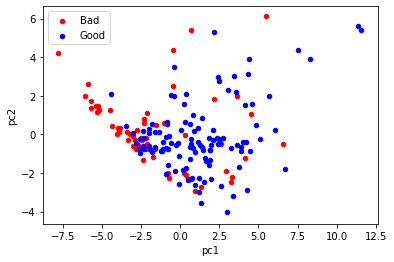

In [80]:
# 悪い評価をプロット
ax = pca_q6Bad.plot.scatter(x = 'pc1', y = 'pc2', color = 'red', label = 'Bad');

# 良い評価をプロット
pca_q6Good.plot.scatter(x = 'pc1', y = 'pc2', color = 'blue', label = 'Good', ax = ax);

失敗では？ww

In [81]:
cluster0

,q1s1,q1s2,q1s3,q1s4,q1s5,q1s6,q1s7,q1s8,q1s9,q1s10,...,q5s8,q5s9,q5s10,q5s11,q5s12,q5s13,q5s14,q5s15,q6,cluster
0,3,3,3,3,3,3,2,3,3,3,...,5,5,5,5,5,5,5,4,5,0
1,3,3,3,3,3,3,3,2,3,3,...,1,5,5,5,5,5,5,5,5,0
2,3,3,3,3,3,3,1,3,3,3,...,3,4,4,4,4,4,4,4,2,0
3,2,3,3,3,3,3,3,3,3,3,...,4,5,3,5,4,5,5,4,3,0
4,3,3,3,2,3,3,3,3,3,3,...,5,5,2,5,2,5,4,3,5,0
5,2,3,3,3,3,3,3,3,3,3,...,5,5,3,5,5,5,5,2,4,0
6,2,3,3,3,3,3,3,3,3,3,...,5,4,5,5,5,5,5,5,3,0
7,2,3,3,3,3,3,3,3,3,3,...,5,5,3,5,5,5,3,3,5,0
8,2,3,3,3,3,3,3,3,3,3,...,4,5,5,5,5,5,5,2,5,0
9,2,3,3,3,3,3,3,2,3,3,...,4,5,5,5,5,5,4,5,3,0


In [82]:
cluster0.loc[:, ["q1s1", "q1s2", "q1s3", "q1s4", "q1s5", "q1s6", "q1s7", "q1s8", "q1s9", "q1s10"]].mean()

q1s1     2.1875
q1s2     3.0000
q1s3     2.9375
q1s4     2.9375
q1s5     3.0000
q1s6     3.0000
q1s7     2.6875
q1s8     2.8750
q1s9     3.0000
q1s10    3.0000
dtype: float64

In [83]:
cluster6.loc[:, ["q1s1", "q1s2", "q1s3", "q1s4", "q1s5", "q1s6", "q1s7", "q1s8", "q1s9", "q1s10"]].mean()

q1s1     1.375
q1s2     1.625
q1s3     1.875
q1s4     2.375
q1s5     2.125
q1s6     2.375
q1s7     1.750
q1s8     2.000
q1s9     2.500
q1s10    2.625
dtype: float64

In [84]:
cluster1 = survey2_clustering[survey2_clustering["cluster"]==1]

In [85]:
cluster2 = survey2_clustering[survey2_clustering["cluster"]==2]
cluster3 = survey2_clustering[survey2_clustering["cluster"]==3]
cluster4 = survey2_clustering[survey2_clustering["cluster"]==4]
cluster5 = survey2_clustering[survey2_clustering["cluster"]==5]

In [86]:
cluster1.mean()

q1s1       1.538462
q1s2       1.846154
q1s3       1.923077
q1s4       2.000000
q1s5       1.961538
q1s6       2.230769
q1s7       2.000000
q1s8       2.346154
q1s9       2.346154
q1s10      2.423077
q2c1       0.038462
q2c2       0.115385
q2c3       0.423077
q2c4       0.346154
q2c5       0.000000
q2c6       0.192308
q2c7       0.500000
q2c8       0.076923
q2c9       0.192308
q2c10      0.076923
q3         3.461538
q4         4.576923
q5s1       2.653846
q5s2       2.923077
q5s3       2.192308
q5s4       2.615385
q5s5       2.884615
q5s6       2.307692
q5s7       2.884615
q5s8       2.615385
q5s9       2.884615
q5s10      2.384615
q5s11      2.961538
q5s12      2.423077
q5s13      2.884615
q5s14      2.807692
q5s15      2.423077
q6         2.846154
cluster    1.000000
dtype: float64

In [87]:
# クラスター１、２、３、４、５について
# Q5、６を計算
cluster1 = cluster1.reset_index(drop=True)
cnt = [[0,0,0,0,0] for _ in range(15)]
for i in range(len(q5_cols)):
    for j in range(len(cluster1)):
        tmp = cluster1[q5_cols[i]][j]
        tmp -= 1
        cnt[i][tmp] += 1
print(cnt)
res1 = []
for i in range(15):
    tmp = cnt[i]
    tmp = np.array(tmp)
    ans = sum(tmp*score)
    ans /= len(cluster1)
    res1.append(ans)
print("cluster1: ", res1)

[[2, 7, 16, 0, 1], [2, 4, 16, 2, 2], [4, 13, 9, 0, 0], [2, 7, 16, 1, 0], [1, 8, 12, 3, 2], [4, 10, 12, 0, 0], [0, 8, 14, 3, 1], [1, 10, 14, 0, 1], [1, 7, 13, 4, 1], [4, 8, 14, 0, 0], [0, 7, 15, 2, 2], [4, 9, 12, 0, 1], [1, 6, 15, 3, 1], [0, 7, 18, 0, 1], [3, 11, 10, 2, 0]]
cluster1:  [3.3461538461538463, 3.076923076923077, 3.8076923076923075, 3.3846153846153846, 3.1153846153846154, 3.6923076923076925, 3.1153846153846154, 3.3846153846153846, 3.1153846153846154, 3.6153846153846154, 3.0384615384615383, 3.576923076923077, 3.1153846153846154, 3.1923076923076925, 3.576923076923077]


In [88]:
cluster2 = cluster2.reset_index(drop=True)
cnt = [[0,0,0,0,0] for _ in range(15)]
for i in range(len(q5_cols)):
    for j in range(len(cluster2)):
        tmp = cluster2[q5_cols[i]][j]
        tmp -= 1
        cnt[i][tmp] += 1
print(cnt)
res2 = []
for i in range(15):
    tmp = cnt[i]
    tmp = np.array(tmp)
    ans = sum(tmp*score)
    ans /= len(cluster2)
    res2.append(ans)
print("cluster2: ", res2)

[[12, 28, 17, 3, 2], [8, 24, 18, 6, 6], [19, 37, 5, 1, 0], [13, 34, 13, 1, 1], [7, 29, 20, 6, 0], [9, 39, 14, 0, 0], [10, 38, 11, 3, 0], [11, 39, 9, 2, 1], [3, 31, 20, 6, 2], [19, 32, 9, 2, 0], [3, 25, 26, 2, 6], [14, 37, 11, 0, 0], [11, 41, 10, 0, 0], [8, 36, 16, 2, 0], [21, 31, 9, 1, 0]]
cluster2:  [3.725806451612903, 3.3548387096774195, 4.193548387096774, 3.9193548387096775, 3.596774193548387, 3.9193548387096775, 3.8870967741935485, 3.9193548387096775, 3.435483870967742, 4.096774193548387, 3.274193548387097, 4.048387096774194, 4.016129032258065, 3.806451612903226, 4.161290322580645]


In [89]:
cluster3 = cluster3.reset_index(drop=True)
cnt = [[0,0,0,0,0] for _ in range(15)]
for i in range(len(q5_cols)):
    for j in range(len(cluster3)):
        tmp = cluster3[q5_cols[i]][j]
        tmp -= 1
        cnt[i][tmp] += 1
print(cnt)
res3 = []
for i in range(15):
    tmp = cnt[i]
    tmp = np.array(tmp)
    ans = sum(tmp*score)
    ans /= len(cluster3)
    res3.append(ans)
print("cluster3: ", res3)

[[10, 30, 42, 9, 2], [8, 33, 40, 9, 3], [10, 51, 30, 2, 0], [6, 38, 41, 5, 3], [0, 11, 59, 16, 7], [1, 24, 59, 8, 1], [0, 22, 57, 13, 1], [2, 13, 59, 16, 3], [0, 8, 56, 23, 6], [5, 43, 42, 2, 1], [1, 11, 50, 27, 4], [4, 30, 51, 8, 0], [1, 19, 60, 11, 2], [2, 13, 63, 14, 1], [4, 24, 52, 12, 1]]
cluster3:  [3.3978494623655915, 3.3655913978494625, 3.7419354838709675, 3.4193548387096775, 2.795698924731183, 3.172043010752688, 3.075268817204301, 2.946236559139785, 2.7096774193548385, 3.5268817204301075, 2.763440860215054, 3.3225806451612905, 3.064516129032258, 3.010752688172043, 3.193548387096774]


In [90]:
cluster4 = cluster4.reset_index(drop=True)
cnt = [[0,0,0,0,0] for _ in range(15)]
for i in range(len(q5_cols)):
    for j in range(len(cluster4)):
        tmp = cluster4[q5_cols[i]][j]
        tmp -= 1
        cnt[i][tmp] += 1
print(cnt)
res4 = []
for i in range(15):
    tmp = cnt[i]
    tmp = np.array(tmp)
    ans = sum(tmp*score)
    ans /= len(cluster4)
    res4.append(ans)
print("cluster4: ", res4)

[[22, 7, 7, 0, 0], [17, 14, 3, 2, 0], [35, 1, 0, 0, 0], [23, 13, 0, 0, 0], [16, 12, 5, 1, 2], [19, 17, 0, 0, 0], [25, 8, 3, 0, 0], [21, 13, 2, 0, 0], [12, 13, 6, 3, 2], [19, 13, 4, 0, 0], [12, 7, 8, 5, 4], [18, 13, 4, 1, 0], [19, 10, 5, 2, 0], [17, 15, 4, 0, 0], [28, 7, 0, 1, 0]]
cluster4:  [4.416666666666667, 4.277777777777778, 4.972222222222222, 4.638888888888889, 4.083333333333333, 4.527777777777778, 4.611111111111111, 4.527777777777778, 3.8333333333333335, 4.416666666666667, 3.5, 4.333333333333333, 4.277777777777778, 4.361111111111111, 4.722222222222222]


In [91]:
cluster5 = cluster5.reset_index(drop=True)
cnt = [[0,0,0,0,0] for _ in range(15)]
for i in range(len(q5_cols)):
    for j in range(len(cluster5)):
        tmp = cluster5[q5_cols[i]][j]
        tmp -= 1
        cnt[i][tmp] += 1
print(cnt)
res5 = []
for i in range(15):
    tmp = cnt[i]
    tmp = np.array(tmp)
    ans = sum(tmp*score)
    ans /= len(cluster5)
    res5.append(ans)
print("cluster5: ", res5)

[[2, 8, 6, 3, 1], [2, 5, 9, 3, 1], [4, 11, 4, 1, 0], [3, 7, 9, 1, 0], [3, 7, 8, 1, 1], [2, 7, 11, 0, 0], [3, 8, 7, 1, 1], [2, 6, 10, 2, 0], [3, 7, 7, 2, 1], [3, 8, 8, 0, 1], [1, 6, 10, 2, 1], [4, 6, 10, 0, 0], [3, 4, 9, 3, 1], [2, 9, 6, 2, 1], [5, 6, 8, 1, 0]]
cluster5:  [3.35, 3.2, 3.9, 3.6, 3.5, 3.55, 3.55, 3.4, 3.45, 3.6, 3.2, 3.7, 3.25, 3.45, 3.75]


In [92]:
c = np.concatenate((res0,res1,res2,res3,res4,res5,res6,res7), axis = 0)
c.resize(8,15)
c = pd.DataFrame(c,index = ["cluster 0","cluster 1","cluster 2","cluster 3","cluster 4","cluster 5", "cluster 6", "cluster 7"], columns = q5_cols)

In [93]:
c

,q5s1,q5s2,q5s3,q5s4,q5s5,q5s6,q5s7,q5s8,q5s9,q5s10,q5s11,q5s12,q5s13,q5s14,q5s15
cluster 0,2.875000,2.625000,2.437500,3.062500,1.562500,2.062500,1.500000,1.875000,1.375000,2.125000,1.375000,1.625000,1.375000,1.625000,2.125000
cluster 1,3.346154,3.076923,3.807692,3.384615,3.115385,3.692308,3.115385,3.384615,3.115385,3.615385,3.038462,3.576923,3.115385,3.192308,3.576923
cluster 2,3.725806,3.354839,4.193548,3.919355,3.596774,3.919355,3.887097,3.919355,3.435484,4.096774,3.274194,4.048387,4.016129,3.806452,4.161290
cluster 3,3.397849,3.365591,3.741935,3.419355,2.795699,3.172043,3.075269,2.946237,2.709677,3.526882,2.763441,3.322581,3.064516,3.010753,3.193548
cluster 4,4.416667,4.277778,4.972222,4.638889,4.083333,4.527778,4.611111,4.527778,3.833333,4.416667,3.500000,4.333333,4.277778,4.361111,4.722222
cluster 5,3.350000,3.200000,3.900000,3.600000,3.500000,3.550000,3.550000,3.400000,3.450000,3.600000,3.200000,3.700000,3.250000,3.450000,3.750000
cluster 6,4.000000,3.000000,4.000000,3.250000,3.750000,4.125000,4.250000,3.750000,3.750000,4.625000,4.000000,3.750000,4.000000,4.000000,4.000000
cluster 7,4.500000,4.250000,4.750000,4.375000,4.625000,4.500000,4.500000,4.500000,4.625000,4.375000,4.500000,4.375000,4.500000,4.500000,4.500000
